In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**DATA UNDERSTANDING**

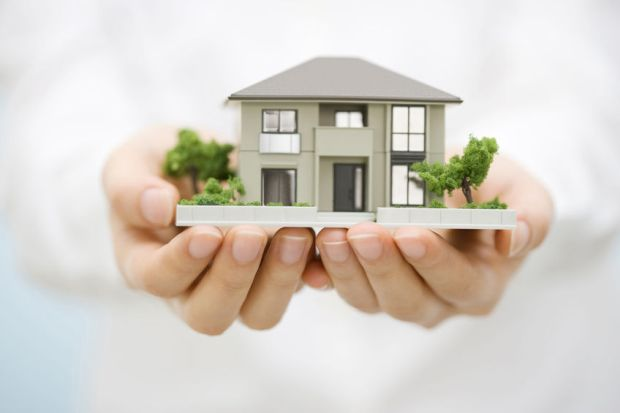

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - crim    per capita crime rate by town
        - zn       proportion of residential land zoned for lots over 25,000 sq.ft.
        - indus    proportion of non-retail business acres per town
        - chas     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - nox      nitric oxides concentration (parts per 10 million)
        - rm       average number of rooms per dwelling
        - age      proportion of owner-occupied units built prior to 1940
        - dis      weighted distances to five Boston employment centres
        - rad      index of accessibility to radial highways
        - tax      full-value property-tax rate per $10,000
        - ptratio  pupil-teacher ratio by town
        - black    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - lstat    % lower status of the population
    :Target:       
        - medv     Median value of owner-occupied homes in $1000's


**Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [ ]:
df.describe().style.background_gradient(cmap = 'bone')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


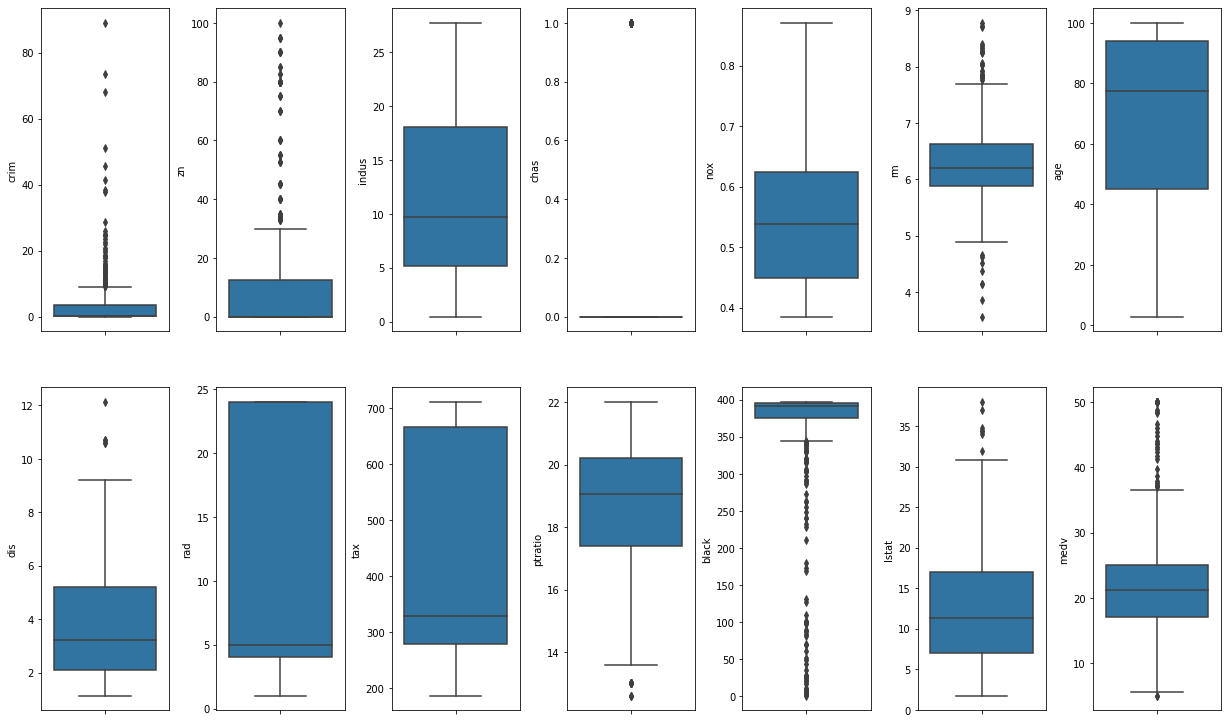

In [ ]:
# Checking outliers using box plot

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (17, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

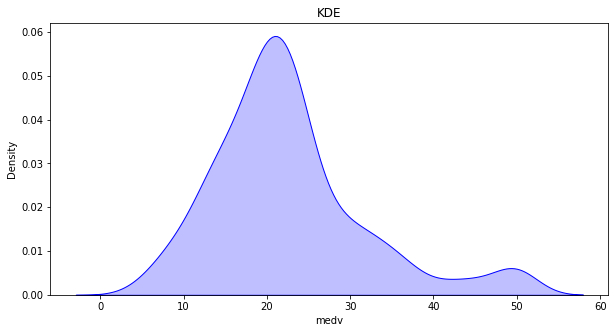

In [ ]:
def hist_plots(df):
    plt.figure(figsize=(10, 5))
    plt.title('KDE')
    sns.kdeplot(df, color='b', shade=True,)
    plt.show()
hist_plots(df['medv'])

In [ ]:
# split train test

from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

**MULTICOLLINEARITY CHECK**

In [ ]:
#calculate VIF scores

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)
vif_df = pd.DataFrame([vif(X.values, i)
                for i in range(X.shape[1])],
                index=X.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature !='const']
vif_df.style.background_gradient(cmap = 'bone')

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


There are several features with high VIF scores:
1. `nox`
2. `rad`
3. `tax`
3. `dis`

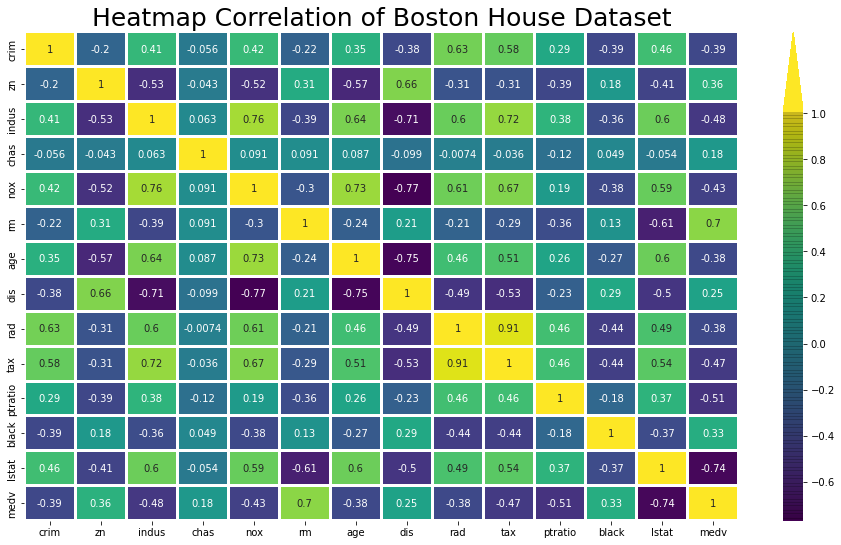

In [ ]:
plt.figure(figsize= (16,9))

cbar_kws = {'shrink':1,
           'extend':'max',
           'extendfrac':.2, 
           'drawedges':True} 
 
sns.heatmap(df.corr(), cmap='viridis', annot = True, linewidth = 2, cbar_kws=cbar_kws)
 
plt.title('Heatmap Correlation of Boston House Dataset', fontsize = 25)
plt.show()

In [ ]:
#drop rendundant feature
feature_df_train = feature_df_train.drop(columns=['nox','rad','dis'])
feature_df_validation = feature_df_validation.drop(columns=['nox','rad','dis'])
feature_df_test = feature_df_test.drop(columns=['nox','rad','dis'])

### Recheck VIF
Optional

In [ ]:
X = add_constant(feature_df_train)
vif_df = pd.DataFrame([vif(X.values, i)
                for i in range(X.shape[1])],
                index=X.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature !='const']
vif_df.style.background_gradient(cmap = 'bone')

,feature,vif_score
1,crim,1.596586
2,zn,1.832693
3,indus,2.970810
4,chas,1.078919
5,rm,1.891979
6,age,2.491050
7,tax,2.827854
8,ptratio,1.480472
9,black,1.346511
10,lstat,2.935815


## Model Training

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha)
Based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.100886202642037
RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419683
RMSE of Ridge regression model with alpha = 1.0 is 5.094521787042946
RMSE of Ridge regression model with alpha = 10 is 5.05166207510316


Ridge with `alpha=10` has the smalles RMSE --> The best model

## Model Evaluation

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df.style.background_gradient(cmap = 'bone')

,feature,coefficient
0,intercept,7.068423
1,crim,-0.052216
2,zn,-0.007855
3,indus,0.034094
4,chas,2.061822
5,rm,5.041802
6,age,0.020313
7,tax,-0.000312
8,ptratio,-0.845843
9,black,0.012919


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

In [ ]:
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=42)

In [ ]:
X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.097514590498467
RMSE of Lasso regression model with alpha = 0.1 is 5.080169848064391
RMSE of Lasso regression model with alpha = 1.0 is 4.988309999786155
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


lasso with `alpha=1.0` has the smalles RMSE --> The best model

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df.style.background_gradient(cmap = 'bone')

,feature,coefficient
0,intercept,22.945673
1,crim,-0.034953
2,zn,0.001941
3,indus,-0.000000
4,chas,0.000000
5,rm,2.572882
6,age,0.041419
7,tax,-0.001003
8,ptratio,-0.757735
9,black,0.011371


## Model Evaluation

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_train)
print('R-squared for Lasso training data is {}'.format(r2_score(y_df_train, y_predict_train)))

y_predict_train = ridge_best.predict(X_df_train)
print('R-squared for Ridge training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for Lasso training data is 0.6908222586747164
R-squared for Ridge training data is 0.7279488107440679


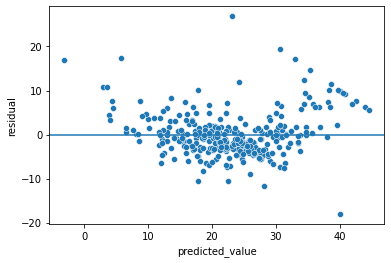

In [ ]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train = lasso_best.predict(X_df_train)

rmse_Lasso = np.sqrt(mean_squared_error(y_df_train, y_predict_train))
mae_Lasso = mean_absolute_error(y_df_train, y_predict_train)
mape_Lasso = mean_absolute_percentage_error(y_df_train, y_predict_train)

In [ ]:
y_predict_train = ridge_best.predict(X_df_train)

rmse_ridge = np.sqrt(mean_squared_error(y_df_train, y_predict_train))
mae_ridge = mean_absolute_error(y_df_train, y_predict_train)
mape_ridge = mean_absolute_percentage_error(y_df_train, y_predict_train)

In [ ]:
models = pd.DataFrame({
    'Model':['Ridge alpha (10)', 'Lasso alapha (1)'],
    'RMSE' :[rmse_ridge , rmse_Lasso],
    'MAE' :[mae_ridge , mae_Lasso],
    'MAPE' :[mape_ridge , mape_Lasso],
})
models

,Model,RMSE,MAE,MAPE
0,Ridge alpha (10),4.970914,3.523197,0.174558
1,Lasso alapha (1),5.299258,3.815568,0.180159


### Testing Error

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

rmse_Lasso = np.sqrt(mean_squared_error(y_df_test, y_predict_test))
mae_Lasso = mean_absolute_error(y_df_test, y_predict_test)
mape_Lasso = mean_absolute_percentage_error(y_df_test, y_predict_test)

In [ ]:
y_predict_test = ridge_best.predict(X_df_test)

rmse_ridge = np.sqrt(mean_squared_error(y_df_test, y_predict_test))
mae_ridge = mean_absolute_error(y_df_test, y_predict_test)
mape_ridge = mean_absolute_percentage_error(y_df_test, y_predict_test)


models_test = pd.DataFrame({
    'Model':['Ridge alpha (10)', 'Lasso alpha (1)'],
    'RMSE' :[rmse_ridge , rmse_Lasso],
    'MAE' :[mae_ridge , mae_Lasso],
    'MAPE' :[mape_ridge , mape_Lasso],
})
models_test

,Model,RMSE,MAE,MAPE
0,Ridge alpha (10),5.446739,3.375222,0.182081
1,Lasso alpha (1),5.315647,3.535685,0.184394


**CONCLUSION**

1. Ridge model has low error in boyh training (MAPE = 17.4%) and testing data (MAPE = 18.2%)

2. Lasso model has low error in boyh training (MAPE = 18%) and testing data (MAPE = 18.4%)

because the gap in training and tessting error both models are not too big so it means that both models are just right

**From this we can conclude that both model has the same performance in predicting housing price**